# linear regression from scratch 

In [1]:
import numpy as n

# simple data gen 

In [2]:
n.random.seed(0) # reproducibility 
X = 2 * n.random.rand(100,1) # 100 r , 1 c
y = 4 + 3 * X + n.random.randn(100,1) # linear relation 

print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


# some bias 

In [3]:
X_b = n.c_[n.ones((100,1)),X]
print(X_b[:5])

[[1.         1.09762701]
 [1.         1.43037873]
 [1.         1.20552675]
 [1.         1.08976637]
 [1.         0.8473096 ]]


# cost fun

In [4]:
def cost(X, y , theta):
    m = len(y) 
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * n.sum(error ** 2) # mean squared error
    return cost 

In [6]:
theta = n.zeros((2,1)) # intercept and slope 
print(theta)

[[0.]
 [0.]]


# gradient descent algo 

In [11]:
def gd(X,y, theta , lr=0.1, e=100):
    m = len(y)
    history = []

    for i in range(e):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - lr * gradients

        cost = cost(X,y,theta)
        history.append(cost)

        if i % 100 == 0:
            print(f'iter {i}: cost {cost}')

        return theta, history

In [12]:
theta , history = gd(X_b , y , theta)

print(f'his {history}')
print (f'final theta {theta}')

UnboundLocalError: cannot access local variable 'cost' where it is not associated with a value

# again 

Iteration 0: Cost 17.009012244814418
Iteration 100: Cost 0.5005024082800785
Iteration 200: Cost 0.49638619229064673
Iteration 300: Cost 0.49622582549702926
Iteration 400: Cost 0.49621957764498226
Iteration 500: Cost 0.49621933423015613
Iteration 600: Cost 0.49621932474677244
Iteration 700: Cost 0.49621932437730204
Iteration 800: Cost 0.4962193243629075
Iteration 900: Cost 0.4962193243623467
Final theta (parameters): [[4.222151  ]
 [2.96846758]]


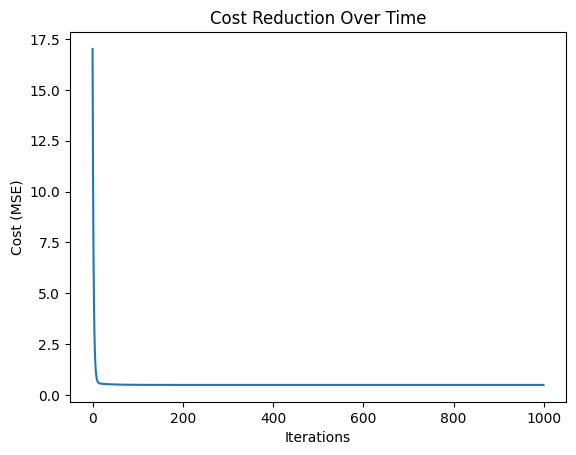

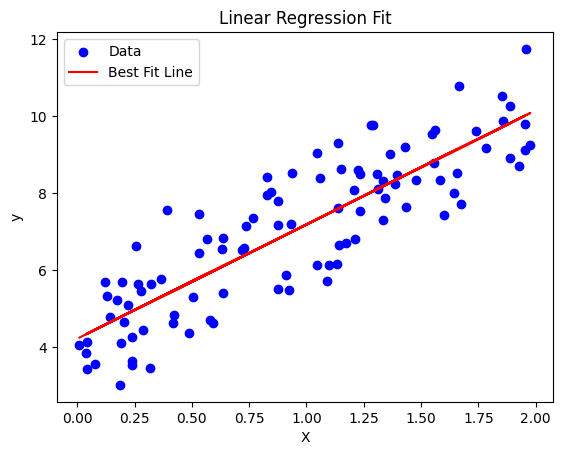

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate random sample data (X, y) for testing
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 rows, 1 column
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# 2. Add a bias term to X (first column of ones for intercept)
X_b = np.c_[np.ones((100, 1)), X]  # Adds a column of ones on the left side

# 3. Define the Cost Function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)  # Number of samples
    predictions = X.dot(theta)  # Predicted values
    error = predictions - y  # Difference between predicted and actual
    cost = (1 / (2 * m)) * np.sum(error ** 2)  # Mean Squared Error
    return cost

# 4. Gradient Descent function
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=1000):
    m = len(y)  # Number of samples
    cost_history = []  # To store the cost at each iteration
    
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)  # Calculate gradients
        theta = theta - learning_rate * gradients  # Update theta
        cost = compute_cost(X, y, theta)  # Calculate cost
        cost_history.append(cost)  # Store the cost
        
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost {cost}")
            
    return theta, cost_history

# 5. Initialize parameters (theta) to zeros
theta = np.zeros((2, 1))  # We have 2 parameters (intercept and slope)

# 6. Train the model using Gradient Descent
learning_rate = 0.1
iterations = 1000
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)
print("Final theta (parameters):", theta)

# 7. Plot cost history to check convergence
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Time")
plt.show()

# 8. Predictions using the trained model
predictions = X_b.dot(theta)

# 9. Plot the results
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, predictions, color="red", label="Best Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()
